In [38]:
import pandas as pd
import geopandas as gpd
import json
import numpy as np

In [7]:
gadow_flow_mapped = pd.read_csv('gadow_flow_mapped.csv')

In [9]:
gadow_footprints_mapped = gpd.read_file("gadow_footprints_mapped.gpkg")

c:\users\askib\pycharmprojects\mobility\venv\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [10]:
gadow_footprints_mapped

,unique_id,osmid,element_type,amenity,wheelchair,name,shop,WroclawGIS:addr:date,WroclawGIS:addr:id,WroclawGIS:addr:layer,...,shelter_type,roof:levels,ways,type,height_sum,points_count,avg_height,area,flat_count,geometry
0,way/101347074,101347074,way,None,None,None,None,None,None,None,...,None,None,None,None,5,2,2.500,8.011580e-09,1,"POLYGON ((16.97296 51.12343, 16.97289 51.12333..."
1,way/101347111,101347111,way,None,None,None,None,None,None,None,...,None,None,None,None,3,1,3.000,3.034365e-09,1,"POLYGON ((16.96973 51.12684, 16.96970 51.12680..."
2,way/101347120,101347120,way,None,None,None,None,None,None,None,...,None,None,None,None,17,1,17.000,4.902548e-08,8,"POLYGON ((16.96193 51.12768, 16.96194 51.12768..."
3,way/101347209,101347209,way,None,None,None,None,None,None,None,...,None,None,None,None,3,1,3.000,4.972210e-09,1,"POLYGON ((16.97286 51.12435, 16.97283 51.12430..."
4,way/101347223,101347223,way,None,None,None,None,None,None,None,...,None,None,None,None,7,1,7.000,2.585990e-09,1,"POLYGON ((16.97230 51.12553, 16.97229 51.12552..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,way/845357478,845357478,way,None,None,None,None,None,None,None,...,None,None,None,None,41,5,8.200,6.573234e-08,5,"POLYGON ((16.97154 51.12230, 16.97151 51.12225..."
672,way/845361412,845361412,way,None,None,None,None,None,None,None,...,None,None,None,None,207,8,25.875,2.377747e-07,50,"POLYGON ((16.96835 51.12311, 16.96836 51.12313..."
673,way/846008339,846008339,way,None,None,None,None,None,None,None,...,None,None,None,None,33,3,11.000,1.014359e-07,10,"POLYGON ((16.96845 51.12400, 16.96844 51.12398..."
674,relation/1445702,1445702,relation,None,None,None,None,None,None,None,...,None,None,"[101430355, 101419736]",multipolygon,6,1,6.000,3.075378e-08,2,"POLYGON ((16.97734 51.12642, 16.97732 51.12642..."


In [13]:
with open('house_mates_distribution.json') as f:
  house_mates_dist = json.load(f)

In [15]:
s = np.array(list(house_mates_dist.values())).astype(int).sum()
for key, value in house_mates_dist.items():
    house_mates_dist[key] = int(house_mates_dist[key]) / s

In [23]:
def sample_tenants_num():

    sample = np.random.multinomial(1, list(house_mates_dist.values()))
    sample = np.argmax(sample)
    tenants_num = sample + 1
    return tenants_num

2

In [26]:
def sample_flat(row):
    flat_num = row['flat_count']
    tenant_sum = 0
    for flat in range(flat_num):
        tenant_sum = tenant_sum + sample_tenants_num()
    return tenant_sum
   

In [29]:
gadow_footprints_mapped['tenants'] = gadow_footprints_mapped.apply(lambda x: sample_flat(x), axis=1)

In [36]:
building_tenants = {}
for i, row in gadow_footprints_mapped.iterrows():
    building_tenants[i] = row['tenants']
building_tenants

{0: 3,
 1: 3,
 2: 21,
 3: 2,
 4: 3,
 5: 3,
 6: 3,
 7: 5,
 8: 3,
 9: 2,
 10: 16,
 11: 1,
 12: 2,
 13: 5,
 14: 33,
 15: 2,
 16: 6,
 17: 15,
 18: 161,
 19: 3,
 20: 3,
 21: 1,
 22: 12,
 23: 14,
 24: 2,
 25: 2,
 26: 54,
 27: 6,
 28: 6,
 29: 2,
 30: 49,
 31: 3,
 32: 25,
 33: 5,
 34: 36,
 35: 45,
 36: 1,
 37: 82,
 38: 44,
 39: 4,
 40: 8,
 41: 7,
 42: 4,
 43: 6,
 44: 5,
 45: 19,
 46: 5,
 47: 2,
 48: 42,
 49: 2,
 50: 10,
 51: 1,
 52: 3,
 53: 2,
 54: 15,
 55: 3,
 56: 5,
 57: 2,
 58: 2,
 59: 5,
 60: 1,
 61: 3,
 62: 28,
 63: 31,
 64: 36,
 65: 19,
 66: 29,
 67: 5,
 68: 4,
 69: 89,
 70: 3,
 71: 23,
 72: 1,
 73: 2,
 74: 1,
 75: 5,
 76: 1,
 77: 4,
 78: 1,
 79: 3,
 80: 8,
 81: 5,
 82: 7,
 83: 3,
 84: 26,
 85: 13,
 86: 12,
 87: 3,
 88: 1,
 89: 53,
 90: 4,
 91: 132,
 92: 5,
 93: 5,
 94: 21,
 95: 5,
 96: 2,
 97: 13,
 98: 5,
 99: 3,
 100: 2,
 101: 1,
 102: 82,
 103: 8,
 104: 30,
 105: 133,
 106: 3,
 107: 8,
 108: 1,
 109: 3,
 110: 6,
 111: 166,
 112: 3,
 113: 40,
 114: 1,
 115: 4,
 116: 1,
 117: 4,
 118: 3

In [37]:
import json
with open('building_tenants_distribution.json', 'w') as outfile:
    json.dump(building_tenants, outfile)

In [39]:
gadow_footprints_mapped.to_file("gadow_footprints_mapped_tenants.gpkg", driver='GPKG')

In [49]:
with open('mean_of_transport_distribution.json', 'w') as outfile:
    json.dump(gadow_flow_mapped['mean_of_transport'].value_counts().to_dict(), outfile)


In [61]:
flow_group = gadow_flow_mapped.groupby('travel_id').count()['lat']

travel_id
0112430f-b9e8-4f5d-b9ba-deb0ffe63c64    2
023db10d-411b-41b6-8bb7-4a5a2da3771c    1
028c0568-cc20-4142-9290-7fe77e0ddc2e    1
05cb1a96-9a56-47dd-9bf0-ba10abec965d    1
06663bf1-2aa9-49fb-8cee-7cdd268819a7    1
                                       ..
fe724f90-6869-4526-9e96-16862230f2ab    1
feed4a16-9bee-44d1-b0ba-5507c17118e0    1
ff1aad4a-2531-43b9-9628-f8975c03f952    1
ff32f6dc-877b-4e8e-921f-e06019e11763    1
ff50ac3e-952e-4aad-be80-7de4227935f8    1
Name: lat, Length: 250, dtype: int64

In [62]:
gadow_flow_mapped

,Unnamed: 0,Unnamed: 0.1,travel_id,lat,long,time,mean_of_transport,geometry,building_id
0,0,0,798a9138-afb4-4599-a4a4-b953673a6586,16.963825,51.126405,2019-10-27 07:40:00,Pieszo,POINT (16.9638253 51.1264047),414
1,1,1,798a9138-afb4-4599-a4a4-b953673a6586,16.960701,51.127634,2019-10-27 07:48:00,Pieszo,POINT (16.9607009 51.1276341),445
2,2,2,5e3a9ce9-2285-41d5-a395-a483adbc45f6,16.957725,51.126554,2019-10-08 05:00:00,Samochód osobowy jako kierowca,POINT (16.9577253 51.1265541),210
3,4,4,9cd2247e-4c96-4d73-b81c-7ee752b099ae,16.969748,51.126558,2019-10-27 18:30:00,Samochód osobowy jako kierowca,POINT (16.9697476 51.12655770000001),521
4,8,8,bf7ad7dd-c470-41da-88d4-fc6d9543d592,16.960303,51.123743,2019-11-05 07:30:59,Komunikacja autobusowa,POINT (16.9603031 51.1237427),670
...,...,...,...,...,...,...,...,...,...
276,2516,2516,c8ac261c-863f-40bf-b9d3-2687243ed212,16.965530,51.130364,2019-11-08 19:00:00,Tramwaj,POINT (16.9655298 51.1303644),684
277,2519,2519,a368837e-40e2-4a8f-b6d2-f19df3637ef1,16.962703,51.127734,2019-11-15 16:43:00,Pieszo,POINT (16.9627026 51.12773370000001),292
278,2521,2521,58b4a090-23bd-4cef-9dc0-eb092509d473,16.961909,51.129431,2019-10-25 19:33:00,Samochód osobowy jako pasażer,POINT (16.9619089 51.12943129999999),586
279,2526,2526,ee05656f-0cbf-48b2-bab4-01dbd9c29e0d,16.962703,51.127734,2019-11-15 17:00:00,Pieszo,POINT (16.9627026 51.12773370000001),292


In [64]:
house_mates_dist



{'1': 0.28337236533957844,
 '2': 0.27400468384074944,
 '3': 0.22014051522248243,
 '4': 0.12177985948477751,
 '0': 0.06323185011709602,
 '5': 0.02576112412177986,
 '6': 0.00936768149882904,
 '7': 0.00234192037470726}

In [65]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'House mates histogram')

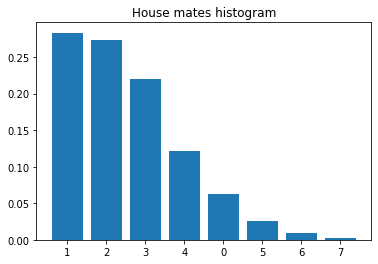

In [69]:
plt.bar(house_mates_dist.keys(), house_mates_dist.values())
plt.title('House mates histogram')